        KELURAHAN  COUNT
0           ANCOL     50
1    BALE KAMBANG     29
2      BAMBU APUS      1
3          BANGKA     51
4            BARU      8
..            ...    ...
87  TANJUNG BARAT     31
88    TEBET BARAT      2
89     TEGAL ALUR    251
90   TEGAL PARANG     76
91        ULUJAMI     18

[92 rows x 2 columns]
           KELURAHAN  COUNT
35    KAMPUNG MELAYU    699
10            CAWANG    445
89        TEGAL ALUR    251
21   CIPINANG MELAYU    242
75     PONDOK PINANG    241
7        BIDARA CINA    203
34             KAMAL    180
70         PETOGOGAN    150
11  CENGKARENG BARAT    125
65      PELA MAMPANG     96


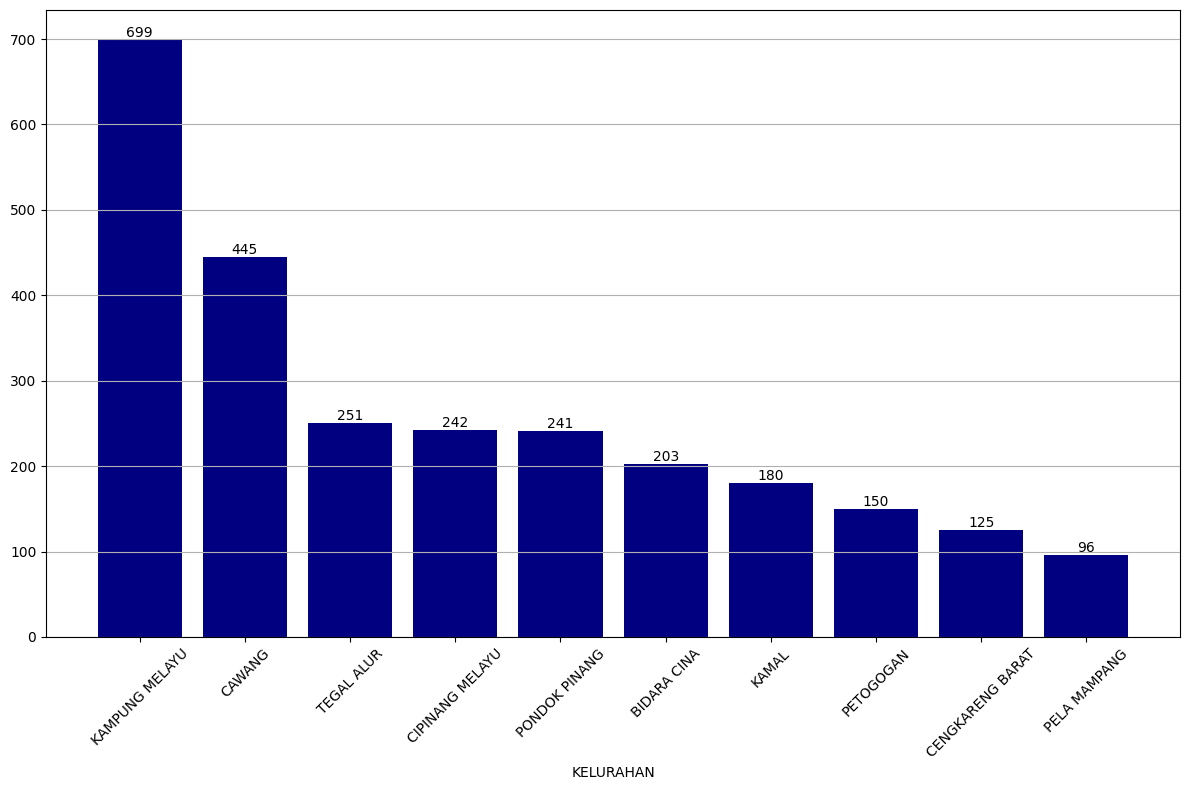

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./csv/Histori_Banjir.csv', sep=';')

filtered_df = data[data['FLOOD'] == 'YES']

# Group by 'WILAYAH' and count the number of 'YES' in the 'FLOOD' column
kelurahan_count = filtered_df.groupby('KELURAHAN').size().reset_index(name='COUNT')

# Display the result
print(kelurahan_count)

top_10_kelurahan = kelurahan_count.sort_values(by='COUNT', ascending=False).head(10)

# Display the result
print(top_10_kelurahan)

plt.figure(figsize=(12, 8))
plt.bar(top_10_kelurahan['KELURAHAN'], top_10_kelurahan['COUNT'], color='navy')

# Customize the chart
plt.xlabel('KELURAHAN')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add data labels on top of the bars
for index, value in enumerate(top_10_kelurahan['COUNT']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
jakarta_utara_flood= data[(data['WILAYAH'] == 'JAKARTA UTARA') & (data['FLOOD'] == 'YES')]
jakarta_selatan_flood=data[(data['WILAYAH'] == 'JAKARTA SELATAN') & (data['FLOOD'] == 'YES')]
jakarta_barat_flood=data[(data['WILAYAH'] == 'JAKARTA BARAT') & (data['FLOOD'] == 'YES')]
jakarta_timur_flood=data[(data['WILAYAH'] == 'JAKARTA TIMUR') & (data['FLOOD'] == 'YES')]
jakarta_pusat_flood=data[(data['WILAYAH'] == 'JAKARTA PUSAT') & (data['FLOOD'] == 'YES')]

In [4]:
kecamatan_utara = jakarta_utara_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_selatan = jakarta_selatan_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_timur = jakarta_timur_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_barat = jakarta_barat_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_pusat = jakarta_pusat_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')

In [5]:
top_utara=kecamatan_utara.sort_values(by='COUNT',ascending=False).head(3)
top_selatan=kecamatan_selatan.sort_values(by='COUNT',ascending=False).head(3)
top_timur=kecamatan_timur.sort_values(by='COUNT',ascending=False).head(3)
top_barat=kecamatan_barat.sort_values(by='COUNT',ascending=False).head(3)
top_pusat=kecamatan_pusat.sort_values(by='COUNT',ascending=False).head(3)

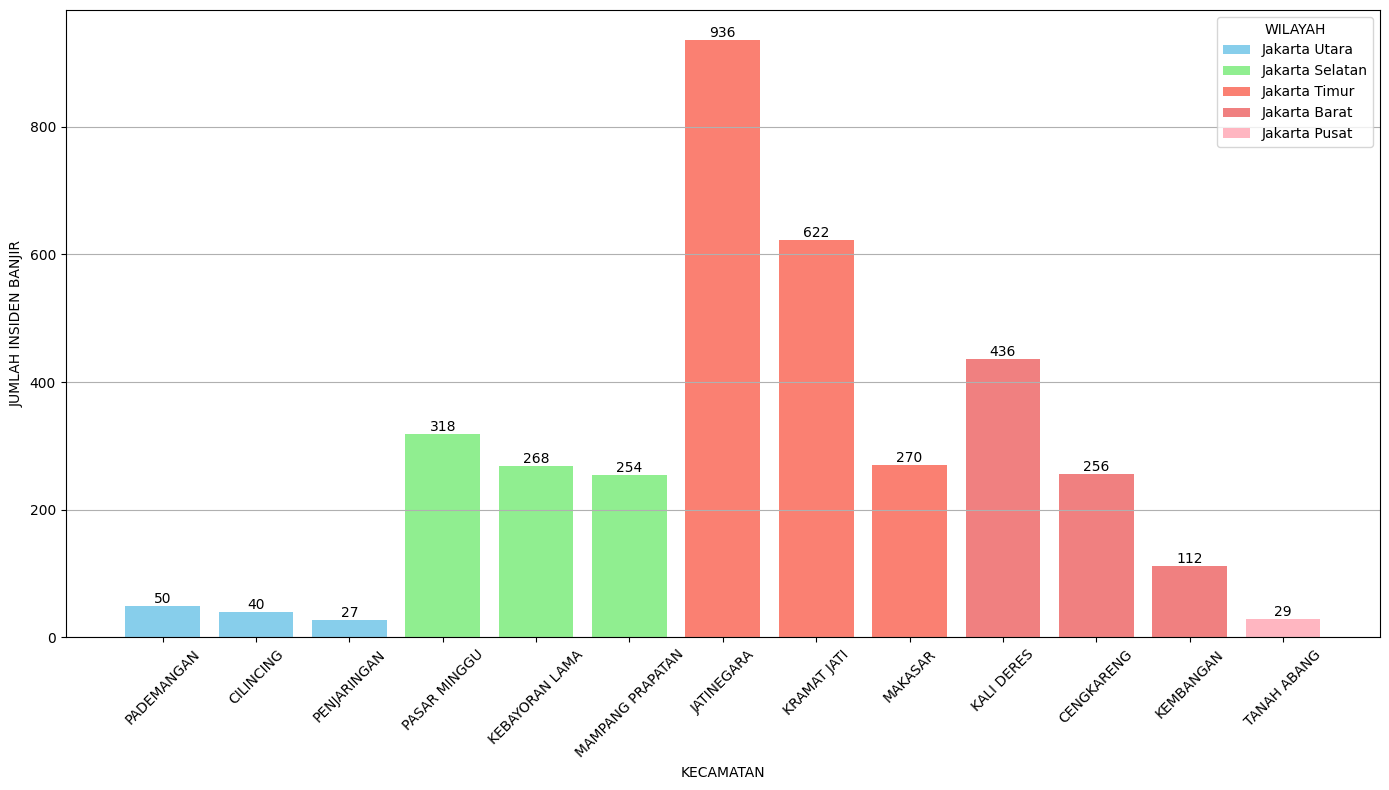

In [6]:
# Combine the top KECAMATAN from each region into a single DataFrame
combined_top_kecamatan = pd.concat([top_utara, top_selatan, top_timur, top_barat, top_pusat])

# Create the WILAYAH list based on the lengths of each DataFrame
wilayah_list = (['Jakarta Utara'] * len(top_utara) + 
                ['Jakarta Selatan'] * len(top_selatan) + 
                ['Jakarta Timur'] * len(top_timur) + 
                ['Jakarta Barat'] * len(top_barat) + 
                ['Jakarta Pusat'] * len(top_pusat))

# Add the WILAYAH column to the combined DataFrame
combined_top_kecamatan['WILAYAH'] = wilayah_list

# Plot the bar chart for the combined DataFrame
plt.figure(figsize=(14, 8))
colors = {'Jakarta Utara':'skyblue', 'Jakarta Selatan':'lightgreen', 'Jakarta Timur':'salmon', 'Jakarta Barat':'lightcoral', 'Jakarta Pusat':'lightpink'}
for wilayah in combined_top_kecamatan['WILAYAH'].unique():
    subset = combined_top_kecamatan[combined_top_kecamatan['WILAYAH'] == wilayah]
    plt.bar(subset['KECAMATAN'], subset['COUNT'], label=wilayah, color=colors[wilayah])

# Customize the chart
plt.xlabel('KECAMATAN')
plt.ylabel('JUMLAH INSIDEN BANJIR')
plt.xticks(rotation=45)
plt.legend(title='WILAYAH')
plt.grid(axis='y')

# Add data labels on top of the bars
for index, value in enumerate(combined_top_kecamatan['COUNT']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

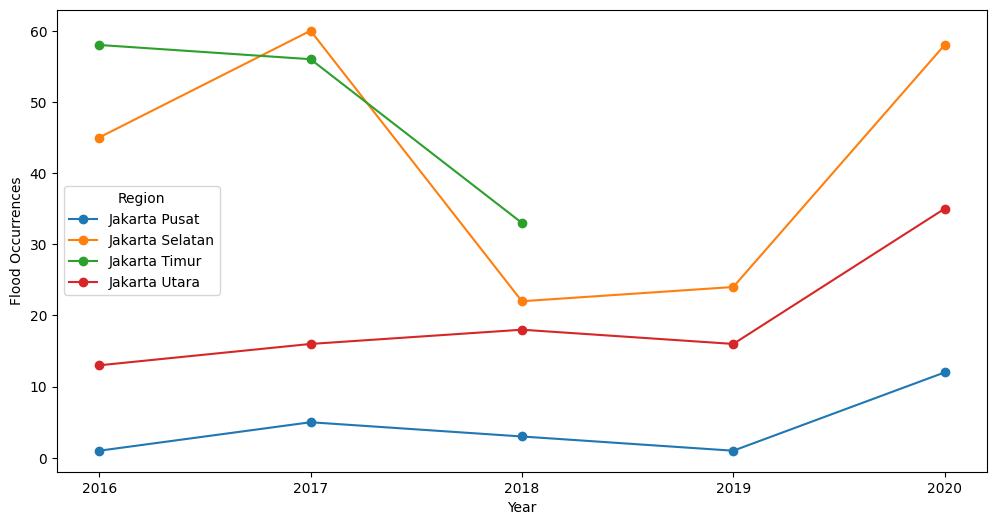

In [24]:
floodData = pd.read_csv('./csv/data_finish.csv')

floodData['date'] = pd.to_datetime(floodData['date'])
floodData['year'] = floodData['date'].dt.year

floodData = floodData[floodData["flood"] == 1]
flood_occurrences = floodData.groupby(['year', 'region_name']).size().unstack()

# Plot the growth of flood occurrence for each region
ax = flood_occurrences.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Flood Occurrences')
plt.legend(title='Region')

# Set xticks to only include integers
ax.set_xticks(np.arange(min(floodData['year']), max(floodData['year'])+1, 1).astype(int))

plt.show()

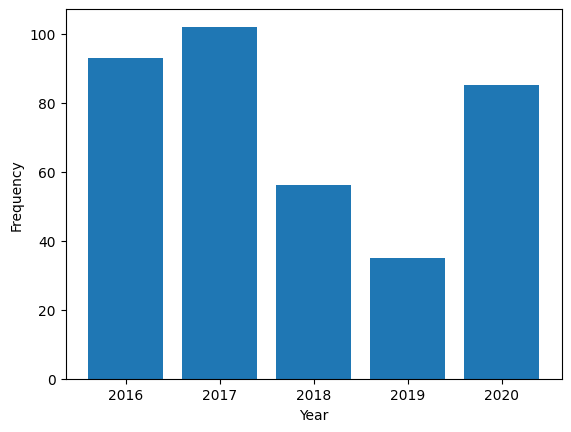

In [26]:
# Filter the data for rows with rain and flood
rain_flood_data = floodData[(floodData['RR'].notnull()) & (floodData['flood'] == 1)]

# Group the filtered data by year and count the occurrences
flood_frequency = rain_flood_data.groupby(floodData['year']).size()

# Create a bar plot
plt.bar(flood_frequency.index, flood_frequency.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()